In [46]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [15]:
df=pd.read_csv('C:/Users/ARAVINDH/Downloads/ToyotaCorolla.csv', encoding='iso-8859-1')
df.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   age               1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  qtax              1436 non-null   int64 
 17  Weight        

In [17]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [21]:
df.rename(columns={"Age_08_04":"age","Quarterly_Tax":"qtax"},inplace=True)
df1=df[["Price","age","KM","HP","cc","Doors","Gears","qtax","Weight"]]
df1.head(2)  #SELECTING GOOD PARAMETERS COLUMNS FOR PREDITICING PRICE

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [22]:
df1.shape

(1436, 9)

In [24]:
df1.info()   # 8 I/P & 1 O/P parameters and checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   qtax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [25]:
df1.corr()

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qtax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [ ]:
#BY CORREALATION BETWEEN I/P PARAMETERS WE CAN IDENTIFY COLLINEARITY.HERE NO MUCH COLLINEARITY 

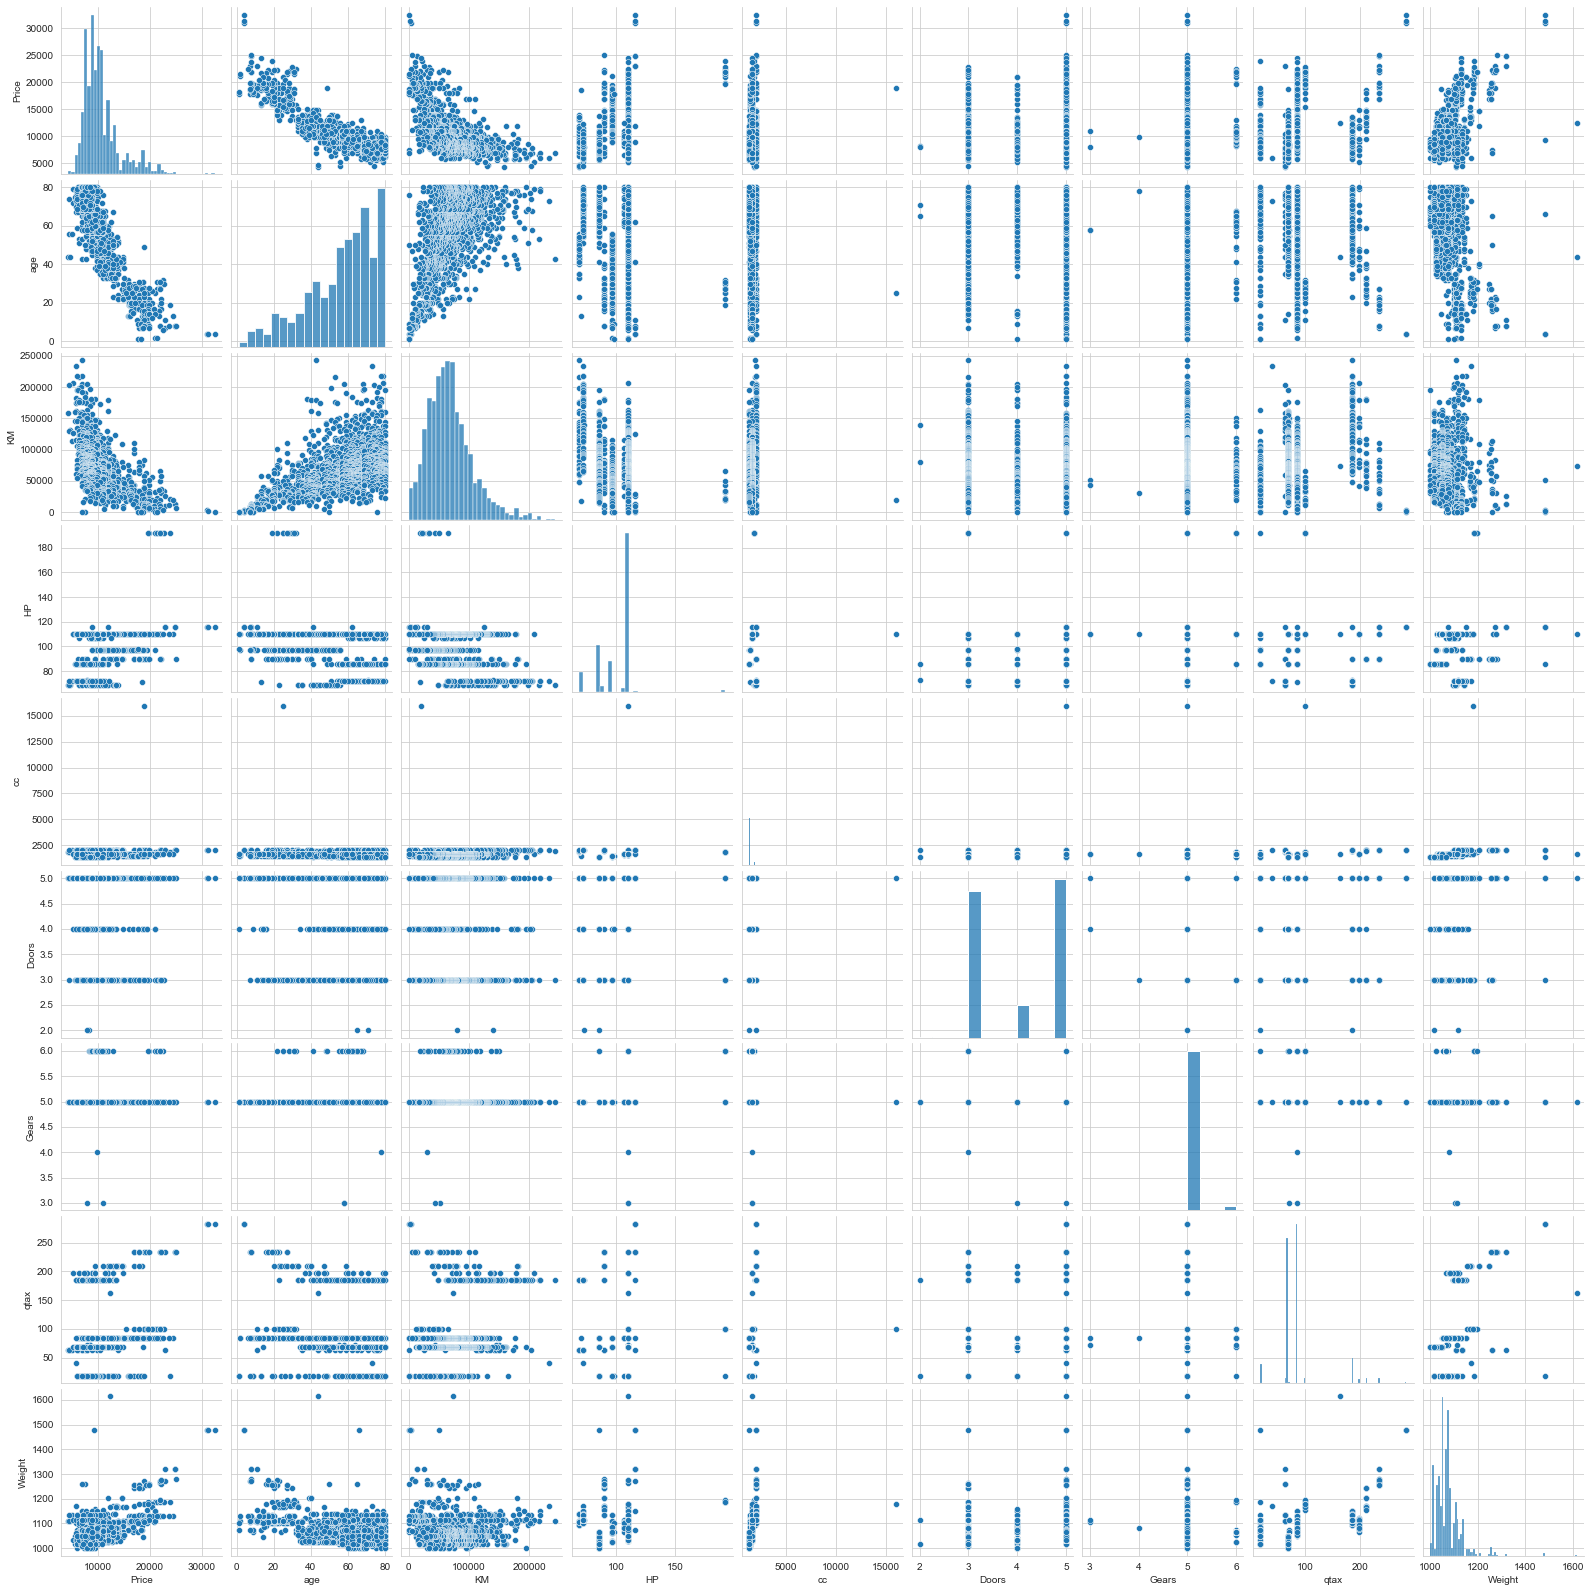

In [26]:
sns.set_style(style='whitegrid')
sns.pairplot(df1)   

In [ ]:
#INITIAL MODEL CREATION

In [28]:
model1=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:25:11   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qtax           3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#PROBABILITY OF "CC" & "Doors" > 0.05
#SO CC & Doors ARE INSIGNIFICANT 

In [30]:
linear=smf.ols("Price~cc+Doors",data=df1).fit() 

In [31]:
linear.pvalues# No changes with using both together

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

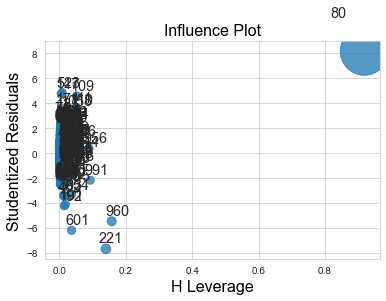

<Figure size 432x288 with 0 Axes>

In [33]:
influence_plot(model1)
plot=plt.figure() #checking high Influence points using leverage

In [34]:
df1[df1.index.isin([601,960,80,221])] #REMOVING OUTLIERS

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
601,7500,50,1,90,2000,3,5,64,1260
960,9390,66,50806,86,1300,3,5,19,1480


In [39]:
df2=df1.drop(df1.index[[601,221,960,80]],axis=0).reset_index()
df2=df2.drop(['index'],axis=1)
df2 # 4 outliers rows removed

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [40]:
#MODEL2
model2= smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data =df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1431.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:47:28   Log-Likelihood:                -12191.
No. Observations:                1432   AIC:                         2.440e+04
Df Residuals:                    1423   BIC:                         2.445e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.618e+04   1419.607    -11.399      0.000    -1.9e+04   -1.34e+04
age         -110.3302      2.444    -45.149      0.000    -115.124    -105.537
KM            -0.0177      0.001    -14.976      0.000      -0.020      -0.015
HP            34.3032      2.712     12.647      0.000      28.983      39.624
cc            -3.6876      0.297    -12.420      0.000      -4.270      -3.105
Doors       -144.0434     36.899     -3.904      0.000    -216.426     -71.661
Gears        468.2073    177.621      2.636      0.008     119.779     816.635
qtax           3.6780      1.362      2.701      0.007       1.007       6.349
Weight        32.1958      1.283     25.085      0.000      29.678      34.713
==============================================================================
Omnibus:                       75.065   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.214
Skew:                           0.120   Prob(JB):                     6.28e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#BETTER AIC AND R SQUARE COMPARE WITH MODEL1

In [41]:
model2_influence = model2.get_influence()
(c_f, _) = model2_influence.cooks_distance #CHECKING INFLUENCE POINT USING COOK DISTANCE

In [42]:
(np.argmax(c_f),np.max(c_f))

(651, 0.16031135298927654)

In [43]:
df2=df2.drop(df2.index[[651]],axis=0) 
df2=df2.reset_index()
df3=df2.drop(['index'],axis=1)
df3

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [45]:
#MODEL3 
model3= smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data =df3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1459.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:56:24   Log-Likelihood:                -12169.
No. Observations:                1431   AIC:                         2.436e+04
Df Residuals:                    1422   BIC:                         2.440e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.731e+04   1423.084    -12.162      0.000   -2.01e+04   -1.45e+04
age         -109.3979      2.428    -45.058      0.000    -114.161    -104.635
KM            -0.0176      0.001    -15.031      0.000      -0.020      -0.015
HP            33.0345      2.698     12.242      0.000      27.741      38.328
cc            -3.6666      0.294    -12.462      0.000      -4.244      -3.089
Doors       -161.2810     36.711     -4.393      0.000    -233.295     -89.268
Gears        461.7826    176.006      2.624      0.009     116.523     807.042
qtax           2.4869      1.368      1.817      0.069      -0.197       5.171
Weight        33.4779      1.295     25.848      0.000      30.937      36.019
==============================================================================
Omnibus:                       68.702   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.620
Skew:                           0.180   Prob(JB):                     2.02e-43
Kurtosis:                       4.780   Cond. No.                     3.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Rsquare is greater and AIC value is less than model2

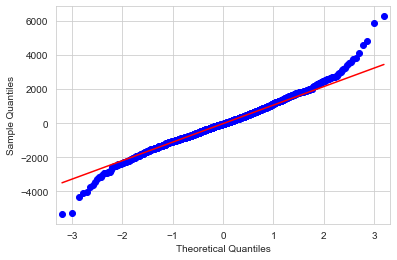

In [47]:
qqplot=sm.qqplot(model3.resid,line='q')
plt.show()

In [48]:
list(np.where(model3.resid>4000)) 

[array([ 124,  146,  170,  521, 1053], dtype=int64)]

In [59]:
df3.drop(df3.index[[ 124,  146,  170,  521, 1053]],axis=0)
df3=df3.reset_index()

In [64]:
df4=df3.drop(['index'],axis=1)
df5=df4.iloc[:,1:]
df5

,Price,age,KM,HP,cc,Doors,Gears,qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1396,7500,69,20544,86,1300,3,5,69,1025
1397,10845,72,19000,86,1300,3,5,69,1015
1398,8500,71,17016,86,1300,3,5,69,1015
1399,7250,70,16916,86,1300,3,5,69,1015


In [66]:
final=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qtax+Weight',data =df5).fit()
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1439.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:15:32   Log-Likelihood:                -11863.
No. Observations:                1401   AIC:                         2.374e+04
Df Residuals:                    1392   BIC:                         2.379e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.661e+04   1388.426    -11.966      0.000   -1.93e+04   -1.39e+04
age         -107.0299      2.405    -44.511      0.000    -111.747    -102.313
KM            -0.0177      0.001    -15.429      0.000      -0.020      -0.015
HP            34.9838      2.658     13.162      0.000      29.770      40.198
cc            -3.8827      0.290    -13.409      0.000      -4.451      -3.315
Doors       -164.2793     35.766     -4.593      0.000    -234.439     -94.119
Gears        469.3264    169.879      2.763      0.006     136.080     802.572
qtax           4.6492      1.375      3.381      0.001       1.952       7.347
Weight        32.6122      1.268     25.727      0.000      30.126      35.099
==============================================================================
Omnibus:                       22.612   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.218
Skew:                          -0.024   Prob(JB):                     1.12e-09
Kurtosis:                       3.839   Cond. No.                     3.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
np.sqrt(np.mean(df5.Price-final.predict(df5))**2) #mean error value

9.240102631802392e-10

In [68]:
def get_standrized_values(value):
    return (value-value.mean())/value.std() #Homoscedasticity

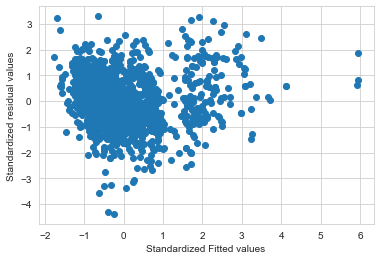

In [74]:
plt.scatter(get_standrized_values(final.fittedvalues),
            get_standrized_values(final.resid))
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [75]:
final_model=smf.ols('Price~np.square(age+KM+cc+Doors+Gears+HP+qtax+Weight)*age+KM+cc+Doors+Gears+HP+qtax+Weight'
                    ,data =df5).fit() #TANSFORMATION #FINAL MODEL

In [76]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1227.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:41:19   Log-Likelihood:                -11822.
No. Observations:                1401   AIC:                         2.367e+04
Df Residuals:                    1390   BIC:                         2.372e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -1.419e+04   1379.789    -10.286      0.000   -1.69e+04   -1.15e+04
np.square(age + KM + cc + Doors + Gears + HP + qtax + Weight)      -2.46e-07   3.33e-08     -7.384      0.000   -3.11e-07   -1.81e-07
age                                                                -122.7963      3.067    -40.043      0.000    -128.812    -116.781
np.square(age + KM + cc + Doors + Gears + HP + qtax + Weight):age  3.215e-09   3.56e-10      9.034      0.000    2.52e-09    3.91e-09
KM                                                                   -0.0096      0.003     -2.868      0.004      -0.016      -0.003
cc                                                                   -3.5452      0.285    -12.450      0.000      -4.104      -2.987
Doors                                                              -148.3435     34.815     -4.261      0.000    -216.638     -80.049
Gears                                                               520.3035    165.203      3.149      0.002     196.230     844.377
HP                                                                   33.7111      2.626     12.836      0.000      28.559      38.863
qtax                                                                  6.1155      1.348      4.536      0.000       3.471       8.760
Weight                                                               30.1315      1.264     23.837      0.000      27.652      32.611
==============================================================================
Omnibus:                        8.987   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               12.283
Skew:                           0.013   Prob(JB):                      0.00215
Kurtosis:                       3.458   Cond. No.                     2.93e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#CHECKING THE MODEL NORMALLY DISTRIBUTED OR NOT 

(array([  6.,  12.,  53., 156., 351., 406., 237., 132.,  38.,  10.]),
 array([-4143.09068408, -3364.81259432, -2586.53450456, -1808.25641481,
        -1029.97832505,  -251.70023529,   526.57785447,  1304.85594422,
         2083.13403398,  2861.41212374,  3639.6902135 ]),
 <BarContainer object of 10 artists>)

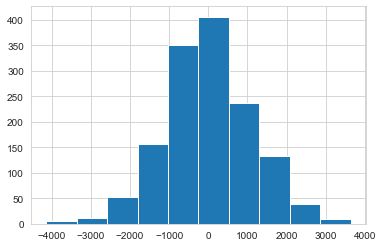

In [77]:
plt.hist(final_model.resid)

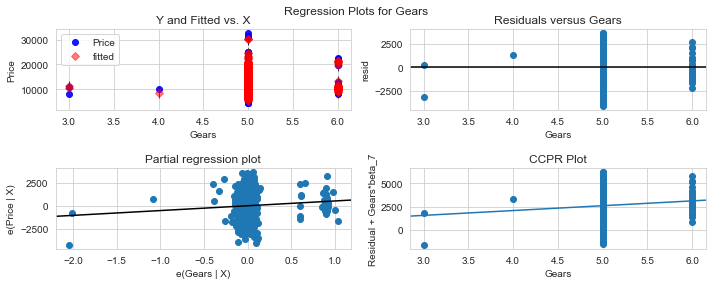

In [80]:
fig = plt.figure(figsize=(10,4))
fig = sm.graphics.plot_regress_exog(final_model, "Gears", fig=fig)
plt.show()          #REGRESSION PLOT FOR ALL INDEPENDENT PARAMETERS

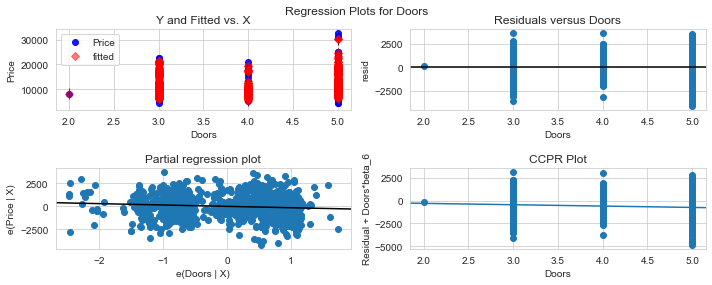

In [82]:
fig = plt.figure(figsize=(10,4))
fig = sm.graphics.plot_regress_exog(final_model, "Doors", fig=fig)
plt.show()

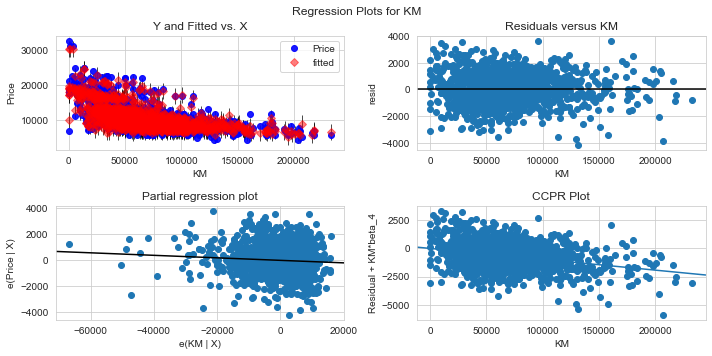

In [84]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(final_model, "KM", fig=fig)
plt.show()

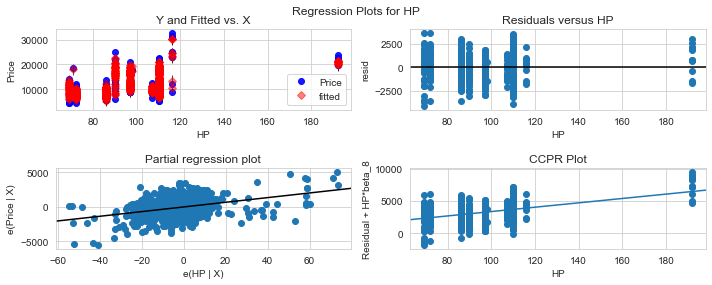

In [85]:
fig = plt.figure(figsize=(10,4))
fig = sm.graphics.plot_regress_exog(final_model, "HP", fig=fig)
plt.show()

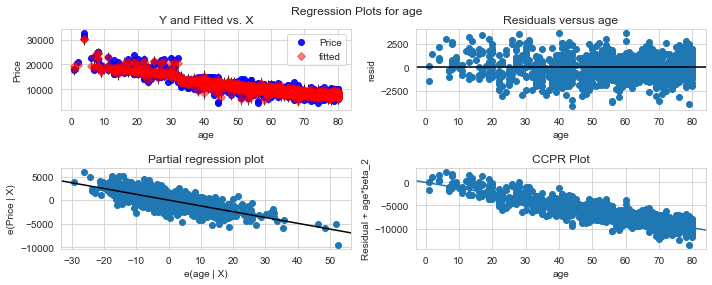

In [86]:
fig = plt.figure(figsize=(10,4))
fig = sm.graphics.plot_regress_exog(final_model, "age", fig=fig)
plt.show()

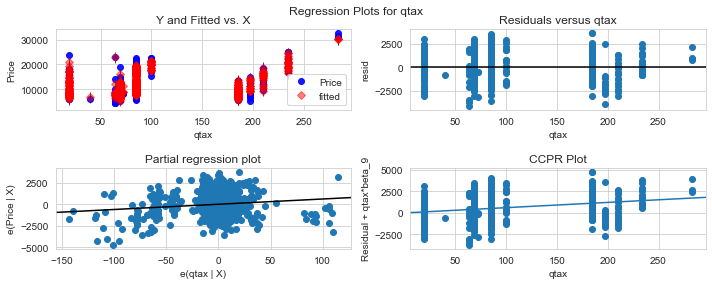

In [87]:
fig = plt.figure(figsize=(10,4))
fig = sm.graphics.plot_regress_exog(final_model, "qtax", fig=fig)
plt.show()

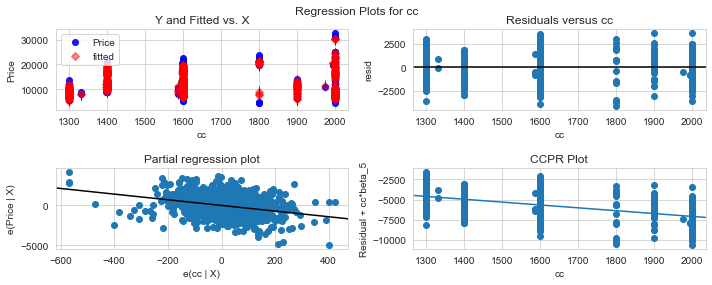

In [88]:
fig = plt.figure(figsize=(10,4))
fig = sm.graphics.plot_regress_exog(final_model, "cc", fig=fig)
plt.show()

In [90]:
final_model.predict(df5.iloc[0:3,:])    #PREDICTING PRICE ATTRIBUTE

0    16579.601169
1    15762.555990
2    16601.100290
dtype: float64